<a href="https://colab.research.google.com/github/Lounes-Kheris98/diabete.predict/blob/main/Diabetes_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
def read_data(filename):
    df = pd.read_csv(filename)
    return df

from google.colab import files
upload = files.upload()

Saving diabetes75pc_100_times.csv to diabetes75pc_100_times.csv


In [3]:
def read_data(filename):
    df = pd.read_csv(filename)
    return df

data = read_data("diabetes75pc_100_times.csv")

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,129,70,18,122,29.43,1.17,45,1
1,1,205,76,36,249,37.28,0.92,29,1
2,8,97,82,0,0,37.82,0.59,68,0
3,7,141,90,41,0,34.25,0.40,39,0
4,4,120,72,0,0,29.12,0.39,46,1


In [4]:
# Dataset dimensions - (rows, columns)
data.shape

(77568, 9)

In [5]:
# Features data-type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77568 entries, 0 to 77567
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               77568 non-null  int64  
 1   Glucose                   77568 non-null  int64  
 2   BloodPressure             77568 non-null  int64  
 3   SkinThickness             77568 non-null  int64  
 4   Insulin                   77568 non-null  int64  
 5   BMI                       77568 non-null  float64
 6   DiabetesPedigreeFunction  77568 non-null  float64
 7   Age                       77568 non-null  int64  
 8   Outcome                   77568 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 5.3 MB


In [6]:
# Statistical summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,77568.0,3.845516,3.369130,0.000,1.00,3.00,6.00,18.00
Glucose,77568.0,124.884488,33.202236,0.000,102.00,121.00,145.00,213.00
BloodPressure,77568.0,69.105469,19.343326,0.000,62.00,72.00,80.00,122.00
SkinThickness,77568.0,20.536458,15.941931,0.000,0.00,23.00,32.00,99.00
Insulin,77568.0,79.799479,115.169692,0.000,0.00,30.50,127.25,846.00
BMI,77568.0,33.181591,8.205376,0.000,28.14,33.23,37.91,72.12
DiabetesPedigreeFunction,77568.0,0.489430,0.343634,0.078,0.25,0.39,0.65,2.60
Age,77568.0,33.240885,11.752648,21.000,24.00,29.00,41.00,81.00
Outcome,77568.0,0.348958,0.476644,0.000,0.00,0.00,1.00,1.00


In [7]:
#statistics description of the data
data.describe([0.10,0.25,0.5,0.75,0.9,0.95,0.99]).T


,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Pregnancies,77568.0,3.845516,3.369130,0.000,0.000,1.00,3.00,6.00,9.00,10.00,13.0000,18.00
Glucose,77568.0,124.884488,33.202236,0.000,88.000,102.00,121.00,145.00,173.00,188.00,203.0000,213.00
BloodPressure,77568.0,69.105469,19.343326,0.000,54.000,62.00,72.00,80.00,88.00,90.00,106.0000,122.00
SkinThickness,77568.0,20.536458,15.941931,0.000,0.000,0.00,23.00,32.00,40.00,44.00,52.0000,99.00
Insulin,77568.0,79.799479,115.169692,0.000,0.000,0.00,30.50,127.25,210.00,293.00,540.0000,846.00
BMI,77568.0,33.181591,8.205376,0.000,24.417,28.14,33.23,37.91,43.12,46.19,53.1733,72.12
DiabetesPedigreeFunction,77568.0,0.489430,0.343634,0.078,0.170,0.25,0.39,0.65,0.91,1.17,1.7600,2.60
Age,77568.0,33.240885,11.752648,21.000,22.000,24.00,29.00,41.00,51.00,58.00,67.0000,81.00
Outcome,77568.0,0.348958,0.476644,0.000,0.000,0.00,0.00,1.00,1.00,1.00,1.0000,1.00


In [8]:
# Count of null values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


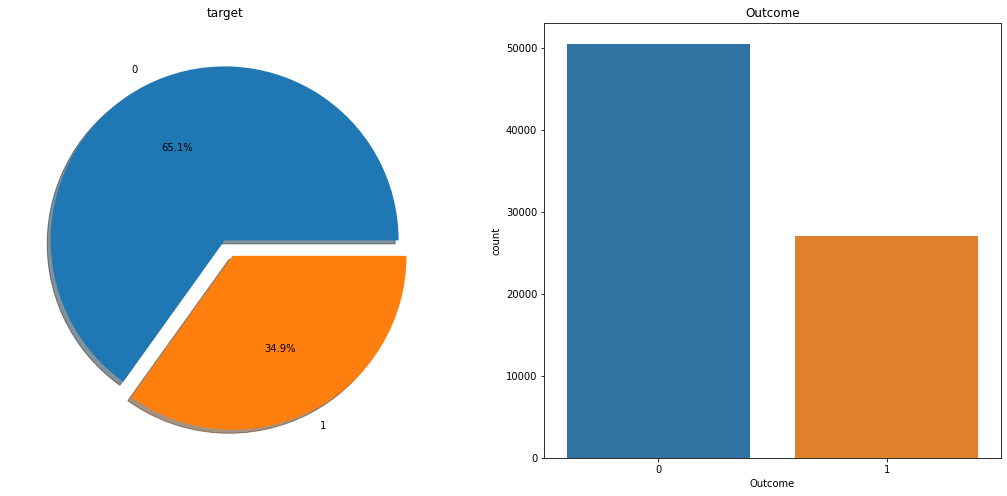

In [9]:
# The distribution of the outcome variable in the data was examined and visualized.
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot('Outcome',data=data,ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

In [10]:
print(data["Outcome"].value_counts()*100/len(data))



0    65.104167
1    34.895833
Name: Outcome, dtype: float64


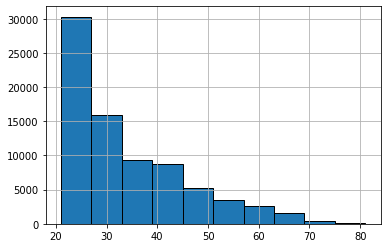

In [11]:
data["Age"].hist(edgecolor= "black")
plt.show()


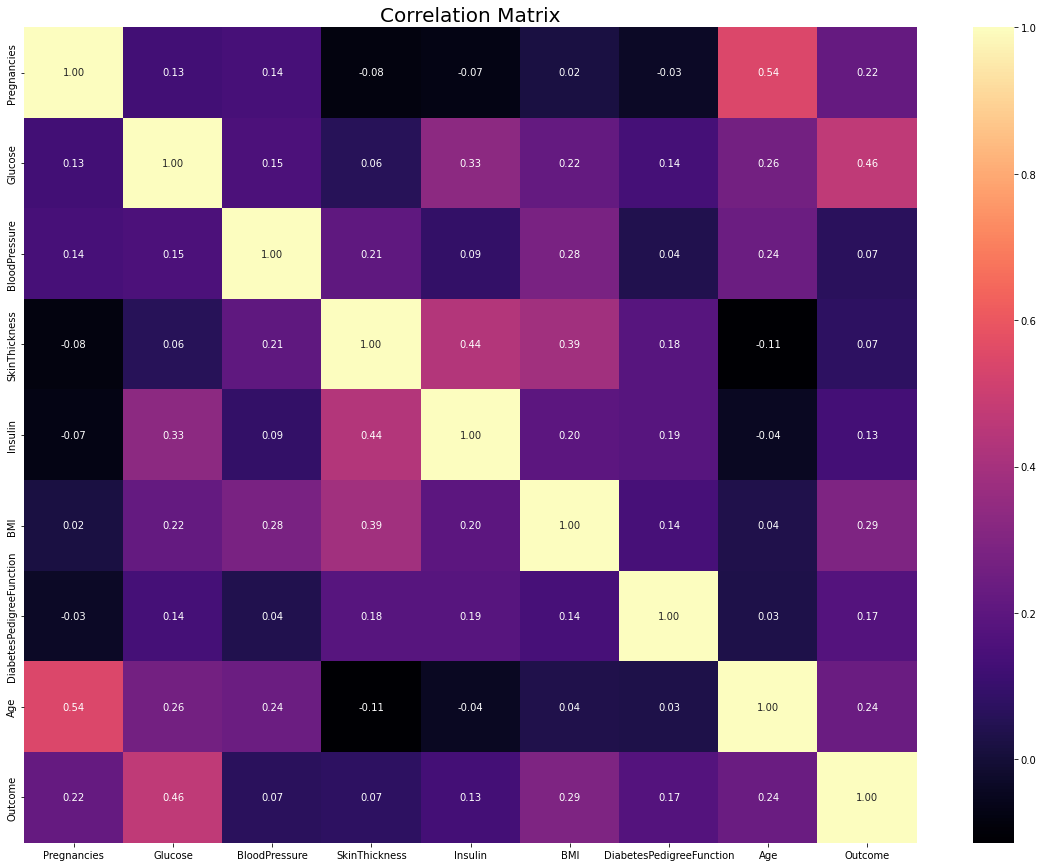

In [12]:
def plot_corr(df,size=11): 
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Yellow means that they are highly correlated.
                                           
    """
    '''corr = df.corr() # calling the correlation function on the datafrmae
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr) # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)),corr.columns) # draw x tickmarks
    plt.yticks(range(len(corr.columns)),corr.columns) # draw y tickmarks
    '''
    f, ax = plt.subplots(figsize= [20,15])
    sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
    ax.set_title("Correlation Matrix", fontsize=20)

plot_corr(data)

In [13]:
'''
  2 - preprocessing Data : 
    a - replace 0 in ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
'''

'\n  2 - preprocessing Data : \n    a - replace 0 in ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]\n'

In [14]:
replace_list_column = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

data_new = data
data_new[replace_list_column] = data[replace_list_column].replace(0, np.NaN)
data_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,129.0,70.0,18.0,122.0,29.43,1.17,45,1
1,1,205.0,76.0,36.0,249.0,37.28,0.92,29,1
2,8,97.0,82.0,NaN,NaN,37.82,0.59,68,0
3,7,141.0,90.0,41.0,NaN,34.25,0.40,39,0
4,4,120.0,72.0,NaN,NaN,29.12,0.39,46,1
...,...,...,...,...,...,...,...,...,...
77563,3,91.0,58.0,11.0,54.0,26.26,0.27,22,0
77564,2,112.0,62.0,32.0,56.0,26.40,0.13,21,0
77565,4,128.0,68.0,NaN,NaN,36.47,0.40,29,0
77566,1,101.0,68.0,21.0,NaN,28.56,1.11,22,0


In [15]:
data_new.isna().sum()

Pregnancies                     0
Glucose                       505
BloodPressure                3535
SkinThickness               22927
Insulin                     37774
BMI                          1111
DiabetesPedigreeFunction        0
Age                             0
Outcome                         0
dtype: int64

In [20]:
#Notre objectif : mettre les données dans un format propice au ML
  #-Train / Test
  #-Encodage
  #- elimination NaN value 

#replace NaN values with mean column
for element in replace_list_column:
  data_new[element].fillna(data_new[element].mean(), inplace = True)

data_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,129.0,70.0,18.00000,122.000000,29.43,1.17,45,1
1,1,205.0,76.0,36.00000,249.000000,37.28,0.92,29,1
2,8,97.0,82.0,29.15342,155.548223,37.82,0.59,68,0
3,7,141.0,90.0,41.00000,155.548223,34.25,0.40,39,0
4,4,120.0,72.0,29.15342,155.548223,29.12,0.39,46,1
...,...,...,...,...,...,...,...,...,...
77563,3,91.0,58.0,11.00000,54.000000,26.26,0.27,22,0
77564,2,112.0,62.0,32.00000,56.000000,26.40,0.13,21,0
77565,4,128.0,68.0,29.15342,155.548223,36.47,0.40,29,0
77566,1,101.0,68.0,21.00000,155.548223,28.56,1.11,22,0


In [25]:
data_new.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [40]:
#Separating the data and labels : 
X = data_new.drop(columns='Outcome', axis=1)
Y = data_new['Outcome']
Y

0        1
1        1
2        0
3        0
4        1
        ..
77563    0
77564    0
77565    0
77566    0
77567    1
Name: Outcome, Length: 77568, dtype: int64

In [34]:
#Data Standardization
scaler = StandardScaler()

In [36]:
scaler.fit(X)

StandardScaler()

In [37]:
standardized_data = scaler.transform(X)

In [39]:
X = standardized_data
Y = data_new['Outcome']
X

array([[ 0.04585303,  0.10425558, -0.19896517, ..., -0.59094473,
         1.98052258,  1.00055664],
       [-0.84459034,  2.50738052,  0.29737562, ...,  0.50475321,
         1.25299891, -0.36084741],
       [ 1.23311084, -0.9075865 ,  0.79371642, ...,  0.58012607,
         0.29266767,  2.95757496],
       ...,
       [ 0.04585303,  0.07263551, -0.3644121 , ...,  0.39169394,
        -0.26025032, -0.36084741],
       [-0.84459034, -0.78110624, -0.3644121 , ..., -0.71237877,
         1.8059169 , -0.95646168],
       [ 1.5299253 ,  1.36905818,  1.29005721, ..., -0.35365983,
        -0.49305789,  1.34090765]])

In [42]:
  X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)

In [43]:
print(X.shape, X_train.shape, X_test.shape)

(77568, 8) (62054, 8) (15514, 8)


Training the Model

In [ ]:
cla